<h1><center><font color=magenta face=georgia>Credit Card Customer Segmentation</font></center></h1>
<b>Dataset link : </b><a href="https://www.kaggle.com/code/des137/customer-segmentation-credit-cards/input?select=CC+GENERAL.csv">Kaggle dataset</a><br>
<p style="font-family: verdona;">
<b>Data Overview</b>
<pre><p style="font-family: verdona;">
<b>CUST_ID : </b>Identification of Credit Card holder (Categorical)
-------------------------------------------------------------------------------------------------------------------
<b>BALANCE : </b>Balance amount left in their account to make purchases
-------------------------------------------------------------------------------------------------------------------
<b>BALANCE_FREQUENCY : </b>How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 
0 = not frequently updated)
-------------------------------------------------------------------------------------------------------------------
<b>PURCHASES : </b>Amount of purchases made from account
-------------------------------------------------------------------------------------------------------------------
<b>ONEOFF_PURCHASES : </b>Maximum purchase amount done in one-go
-------------------------------------------------------------------------------------------------------------------
<b>INSTALLMENTS_PURCHASES : </b>Amount of purchase done in installment
-------------------------------------------------------------------------------------------------------------------
<b>CASH_ADVANCE : </b>Cash in advance given by the user
-------------------------------------------------------------------------------------------------------------------
<b>PURCHASES_FREQUENCY : </b>How frequently the Purchases are being made, score between 0 and 1 (1 = frequently 
purchased, 0 = not frequently purchased)
-------------------------------------------------------------------------------------------------------------------
<b>ONEOFFPURCHASESFREQUENCY : </b>How frequently Purchases are happening in one-go (1 = frequently purchased, 
0 = not frequently purchased)
-------------------------------------------------------------------------------------------------------------------
<b>PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done,
0 = not frequently done)
-------------------------------------------------------------------------------------------------------------------
<b>CASHADVANCEFREQUENCY : </b>How frequently the cash in advance being paid
-------------------------------------------------------------------------------------------------------------------
<b>CASHADVANCETRX : </b>Number of Transactions made with "Cash in Advanced"
-------------------------------------------------------------------------------------------------------------------
<b>PURCHASES_TRX : </b>Numbe of purchase transactions made
-------------------------------------------------------------------------------------------------------------------
<b>CREDIT_LIMIT : </b>Limit of Credit Card for user
-------------------------------------------------------------------------------------------------------------------
<b>PAYMENTS : </b>Amount of Payment done by user
-------------------------------------------------------------------------------------------------------------------
<b>MINIMUM_PAYMENTS : </b>Minimum amount of payments made by user
-------------------------------------------------------------------------------------------------------------------
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user
-------------------------------------------------------------------------------------------------------------------
<b>TENURE :</b> Tenure of credit card service for user

<center><font color=red face=georgia><h2>Importing Libraries

In [2]:
#============================================= preprocessing libraries =================================================
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from colorama import Fore
from sklearn.impute import SimpleImputer
import warnings


#============================================= visualization libraries ==================================================
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image, display


#============================================= statistical libraries ====================================================
import numpy as np
from scipy.stats import normaltest


#============================================ clustering models, evaluation libraries ====================================
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


#============================================== classification models ================================================ 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


#================================== classifier evaluation libraries =================================================
from sklearn.metrics import accuracy_score, confusion_matrix


#============================================ Pipeline libraries =========================================================
import joblib
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

<center><font color=red face=georgia><h2>Data Ingestion

In [3]:
df = pd.read_csv('datasets/Customer Data.csv')
print(df.shape)
df.head()

(8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<center><h1><font face=georgia color=red>Data Cleaning and Preprocessing

In [5]:
len(df) == len(df.CUST_ID.unique())

True

<h4><font face=verdona><hr>Dropping ID column as all of the values are unique and doesn't bring any value to the data<hr>

In [6]:
df.drop(columns=['CUST_ID'], inplace=True)

<center><h3><font color=cyan face=verdona>Handling duplicate records

In [7]:
df.duplicated().sum()

np.int64(0)

<h3><font color=cyan face=verdona><center>Handling Missing values

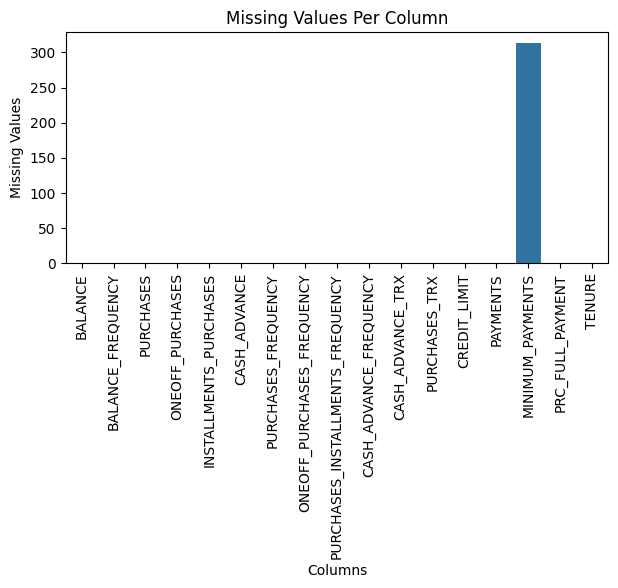

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,3))
missing_values = df.isnull().sum()  
sns.barplot(x=missing_values.index, y=missing_values.values)  
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()


<h4><font face=verdona><hr>We can drop the missing records as the number of missing records is minimal<hr>

In [9]:
df.dropna(inplace=True)

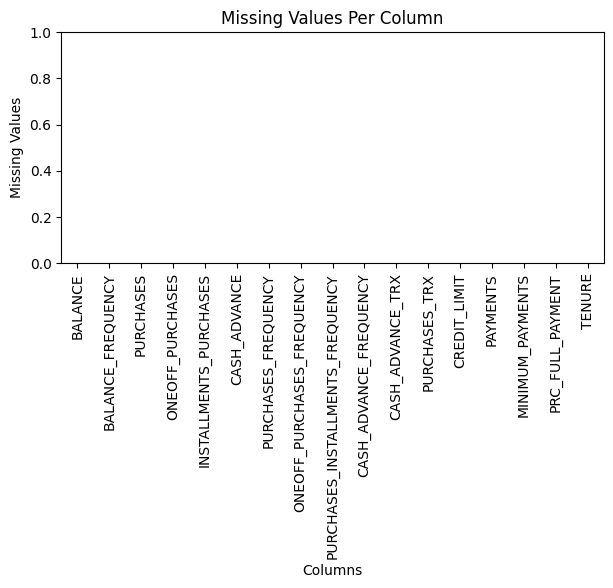

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,3))
missing_values = df.isnull().sum()  
sns.barplot(x=missing_values.index, y=missing_values.values)  
plt.xticks(rotation=90)
plt.ylim(0, missing_values.values.max() + 1)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()

<h4><font face=verdona><hr>Data in entirely Numeric, thus encoding is not required<hr>

<center><h2><font face=georgia color=red>EDA

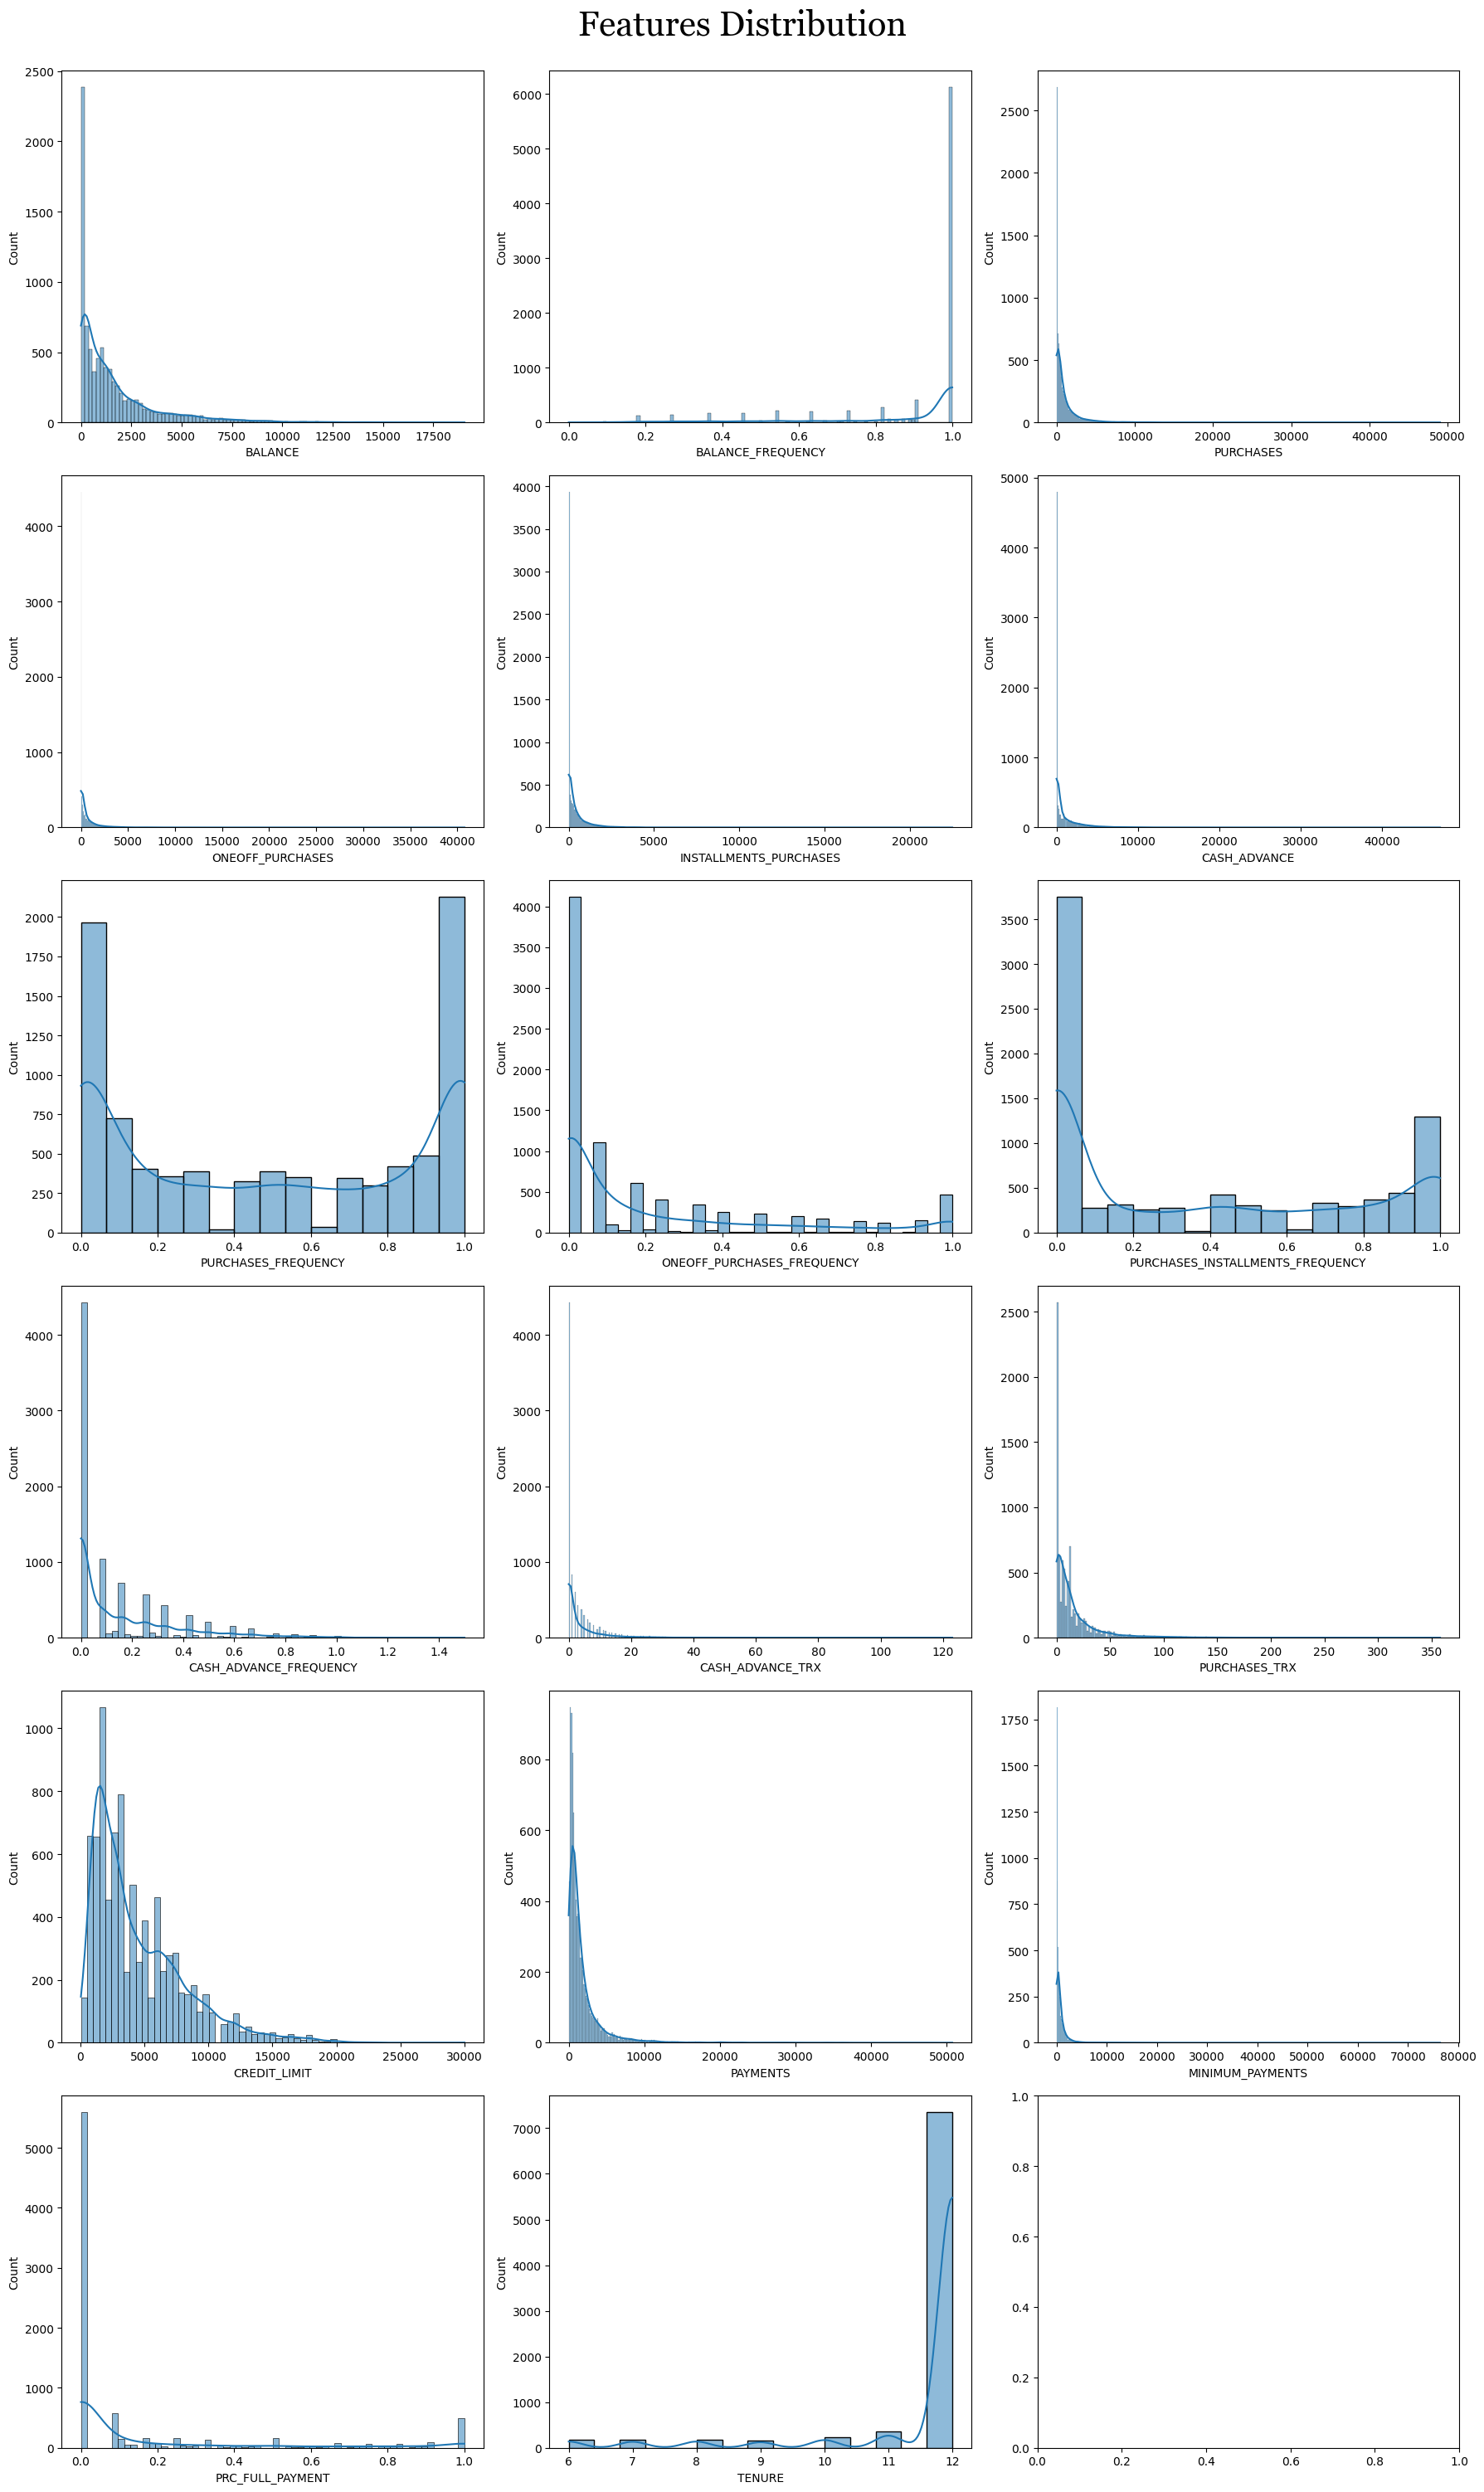

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df.columns)+1)/3), figsize=(18,5*round((len(df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[index])
plt.suptitle('Features Distribution', font='georgia', fontsize=30, y=1)
plt.tight_layout()
plt.show()

<h3><center><font face=verdona color=cyan> Normalization using Log </font></h2></center>

<h4><font face=verdona><hr>As the data is skewed I will use Log transformation to Normalize the data<hr>

In [12]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


log_transformed_df = df.copy()
for col in log_transformed_df.columns:
    if col in cols:
        log_transformed_df[col] = np.log(1 + log_transformed_df[col])

log_transformed_df['TENURE'] = log_transformed_df['TENURE'].astype(int)
print(log_transformed_df.shape)
log_transformed_df.head()

(8636, 17)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.818182      95.40          0.000000   
1  8.071989           0.909091       0.00          0.000000   
2  7.822504           1.000000     773.17          6.651791   
4  6.707735           1.000000      16.00          2.833213   
5  7.501540           1.000000    1333.28          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.166667   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             1.000000   
4                0.000000      0.000000             0.083333   
5                7.196147      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.080042   
1                    0.000000                          0.000000   
2                    0.693147                          0.000000   
4                    0.080042                          0.000000   
5                    0.000000                          0.459532   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00          0.000000       1.098612      6.908755   
1                    0.25          1.609438       0.000000      8.853808   
2                    0.00          0.000000       2.564949      8.922792   
4                    0.00          0.000000       0.693147      7.090910   
5                    0.00          0.000000       2.197225      7.496097   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  5.312231          4.945277          0.000000      12  
1  8.319725          6.978531          0.200671      12  
2  6.434654          6.442994          0.000000      12  
4  6.521114          5.504483          0.000000      12  
5  7.244983          7.786654          0.000000      12

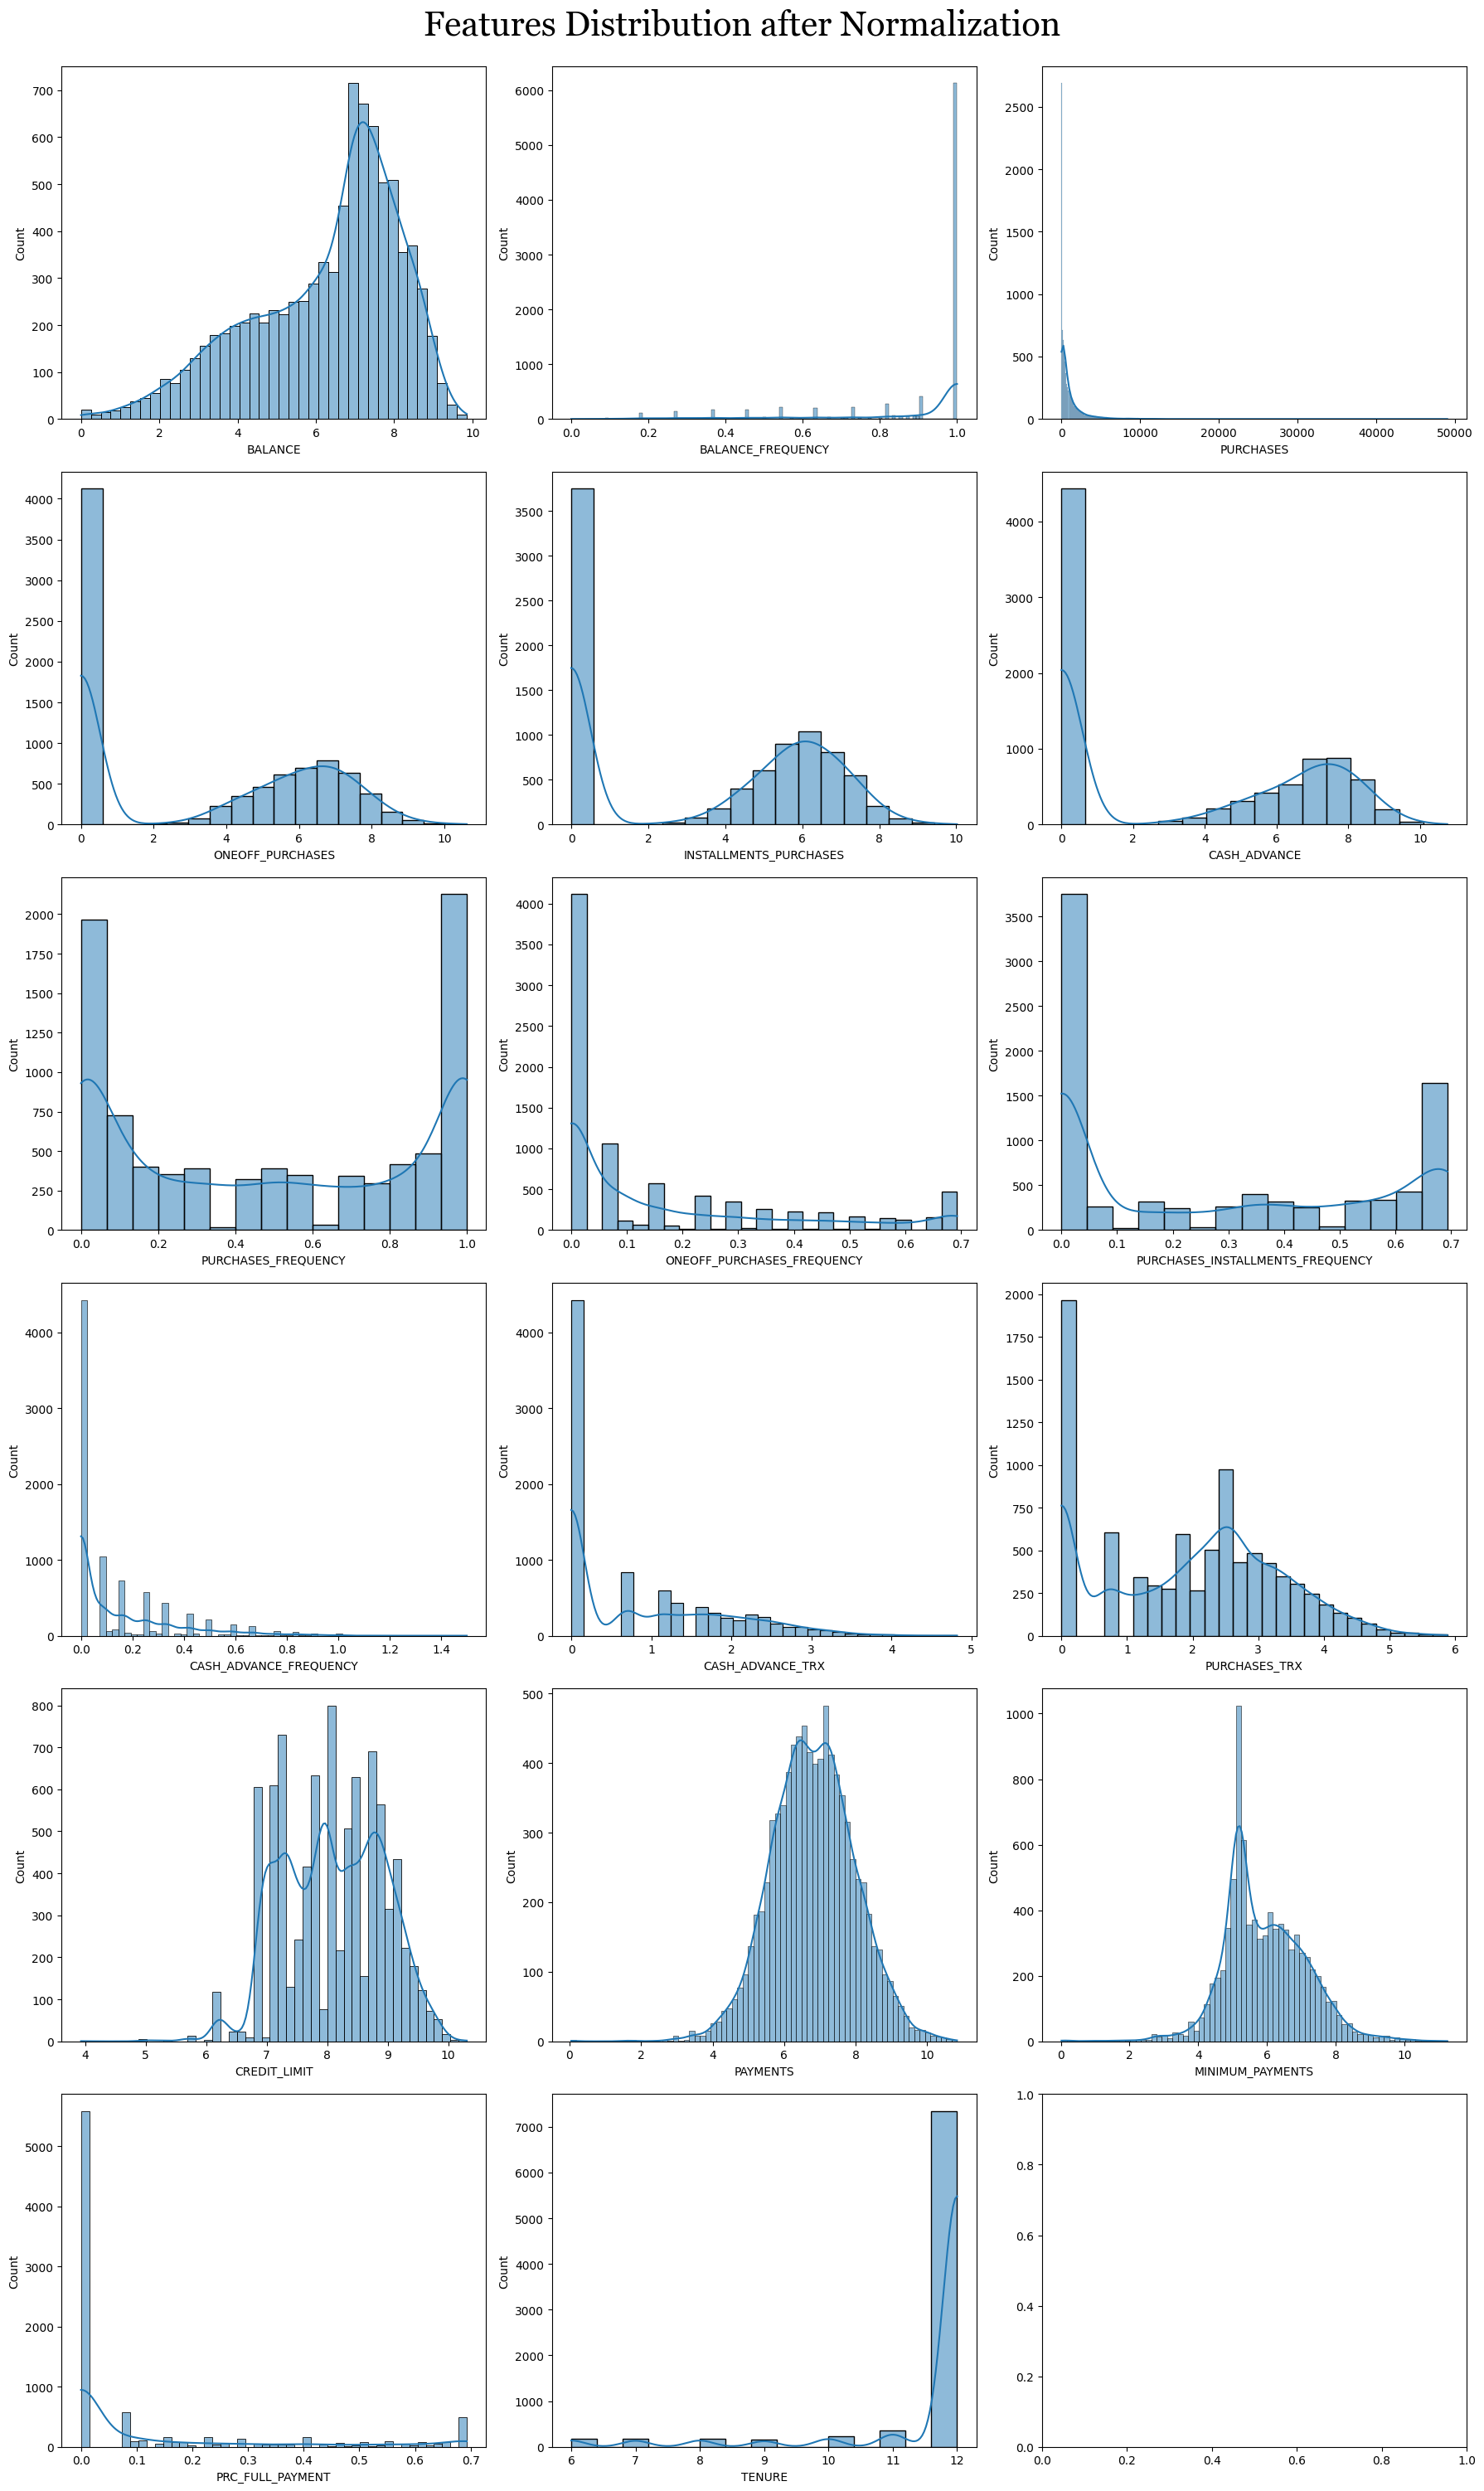

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(log_transformed_df.columns)+1)/3), 
                       figsize=(18,5*round((len(log_transformed_df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(log_transformed_df.columns):
    sns.histplot(log_transformed_df[col], kde=True, ax=axes[index])
plt.suptitle('Features Distribution after Normalization', font='georgia', fontsize=30, y=1)
plt.tight_layout()
plt.show()

In [14]:
def lb_ub(data, col):
    upper_b = np.percentile(data[col], 99.7)
    lower_b = np.percentile(data[col], 0.3)
    return lower_b, upper_b

lb_values = []
ub_values = []

for feature in df.columns:
    lb, ub = lb_ub(df, feature)
    lb_values.append(lb)
    ub_values.append(ub)

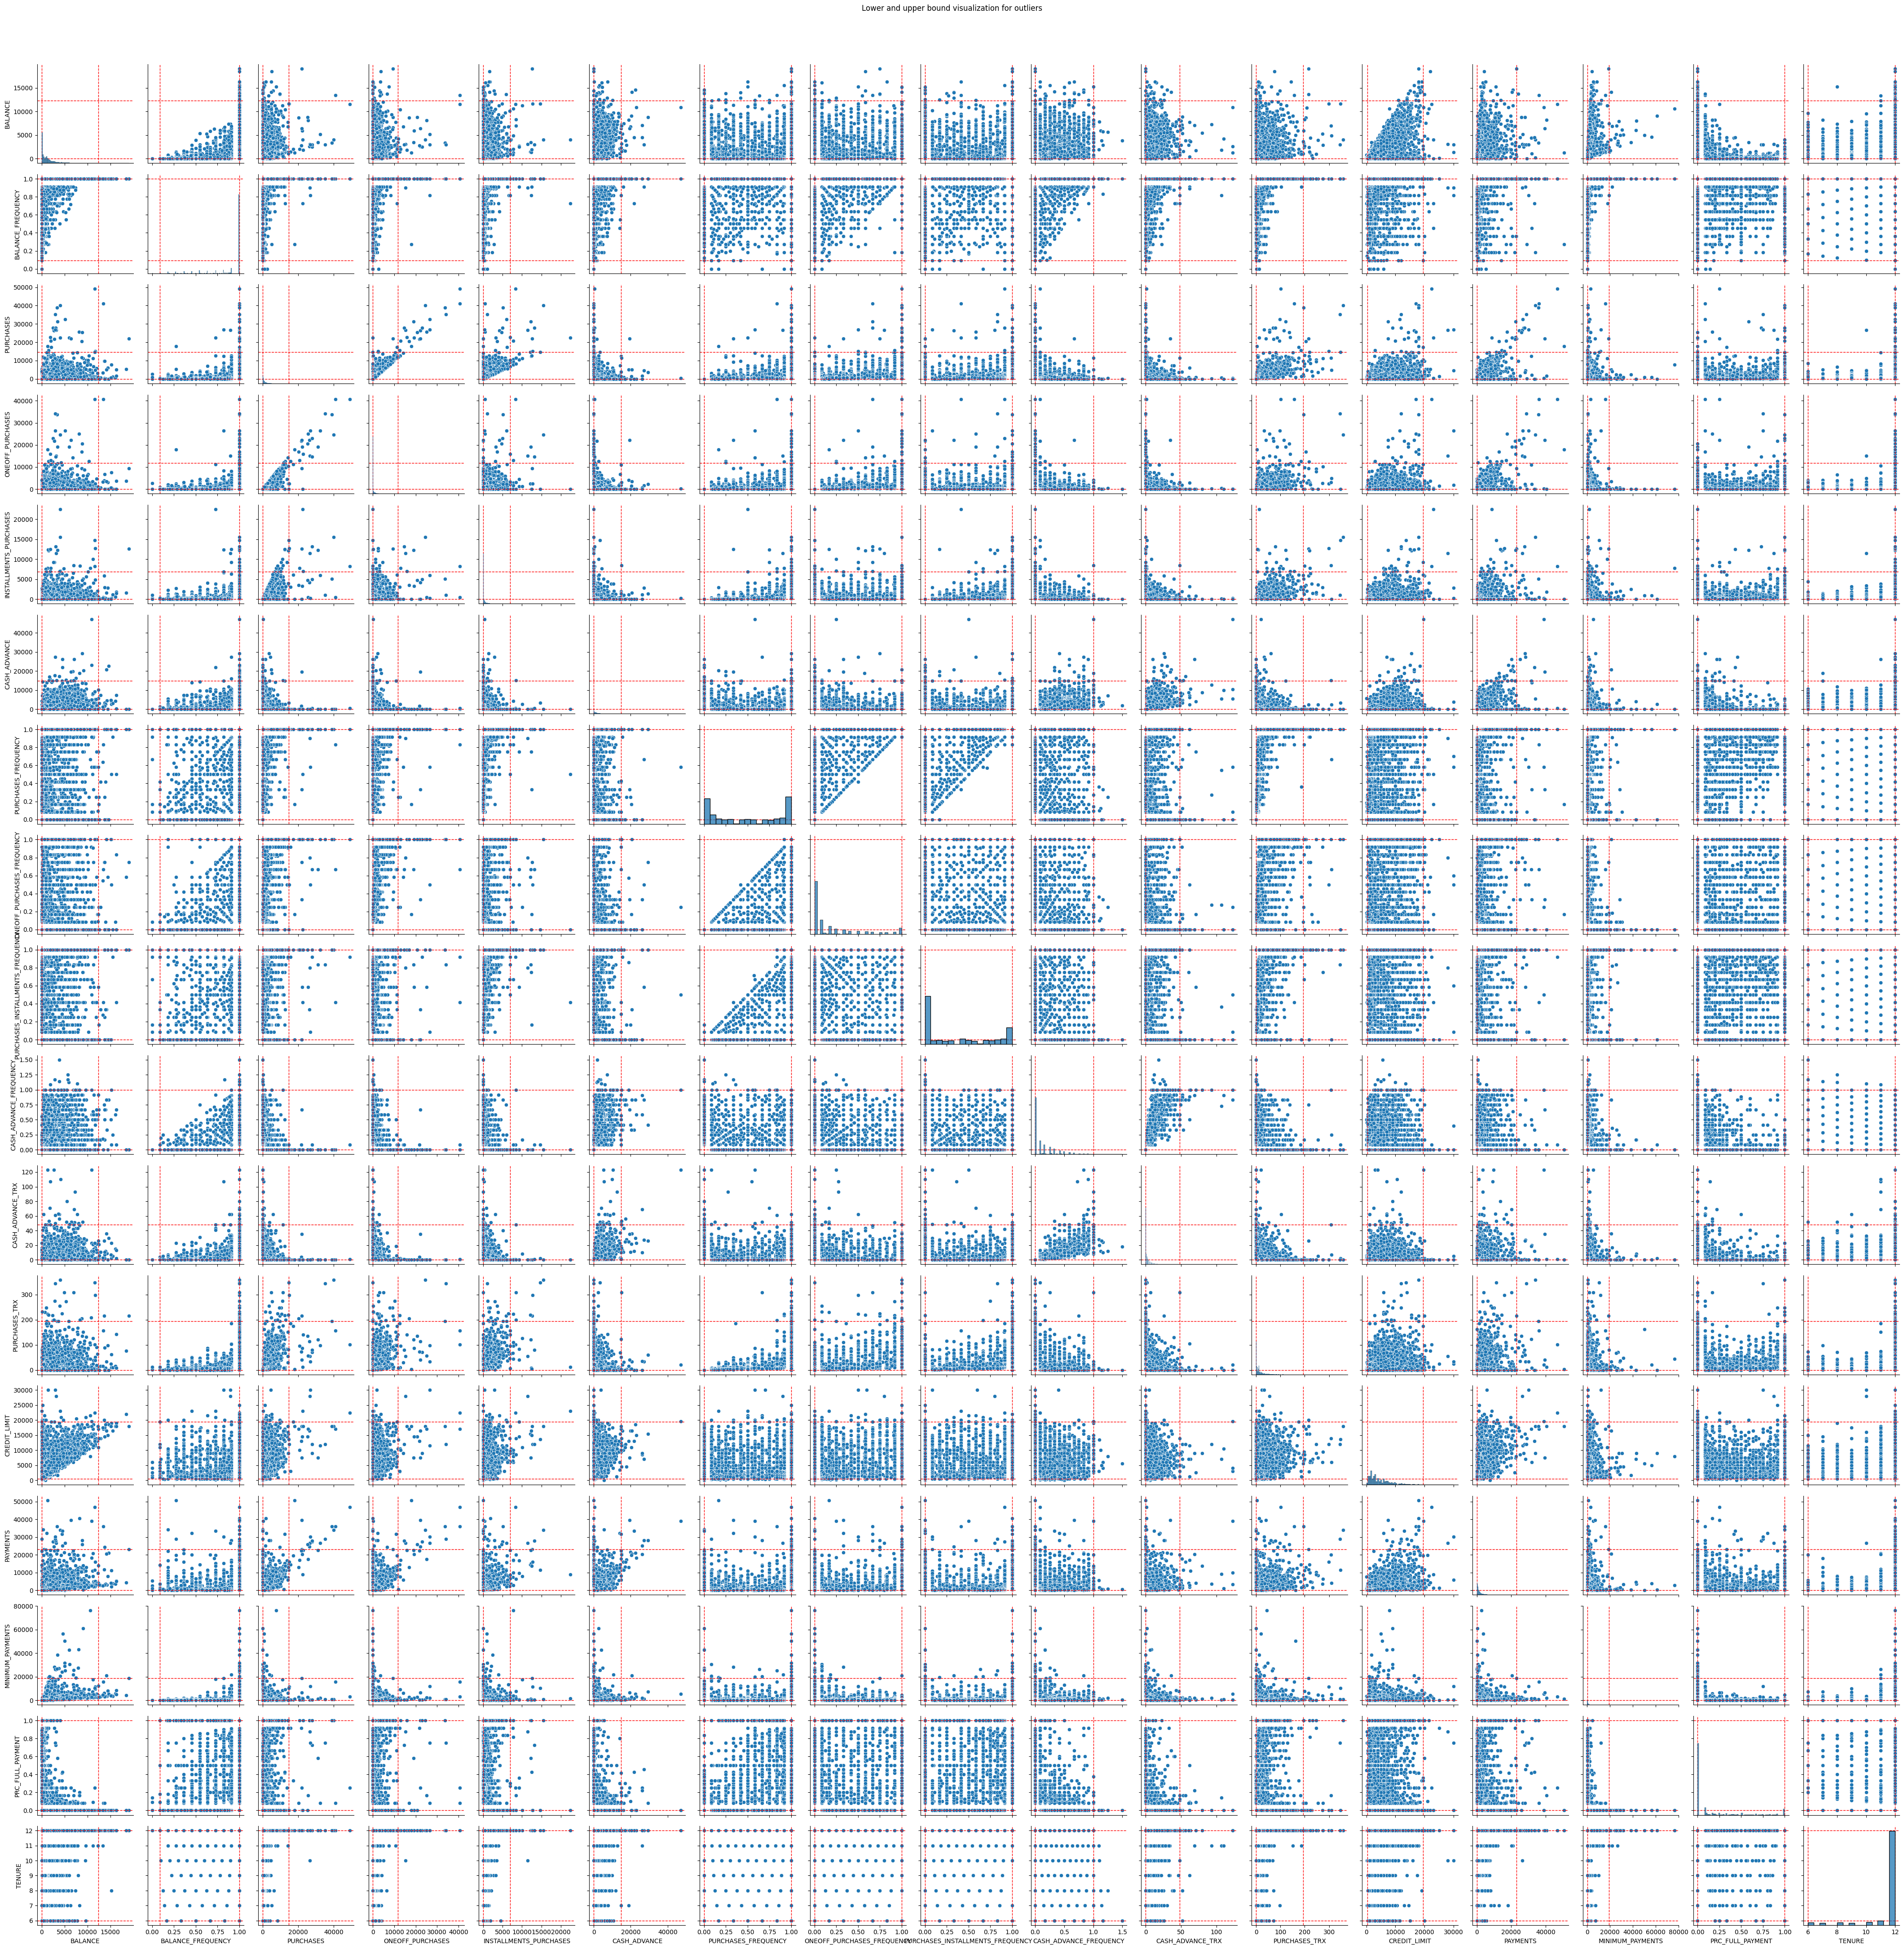

In [15]:
pairplot = sns.pairplot(df)
plt.suptitle('Lower and upper bound visualization for outliers', y=1.02) 
for row in range(len(df.columns)):
    for col in range(len(df.columns)):
        pairplot.axes[row, col].axvline(x=lb_values[col], color='red', linestyle='--', linewidth=1)
        pairplot.axes[row, col].axvline(x=ub_values[col], color='red', linestyle='--', linewidth=1)
        pairplot.axes[row, col].axhline(y=lb_values[row], color='red', linestyle='--', linewidth=1)
        pairplot.axes[row, col].axhline(y=ub_values[row], color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

<h4><font face=verdona><hr>Significant number of outliers can be detected, but the outliers cannot be capped or trimmed as outliers can have specific preporties which may be used to form clusters<hr>

<h3><font face=verdona color=cyan><center>Dropping Constant Columns</font></h3>
<b>columns with more than 75% of same records

In [16]:
cont_feat = log_transformed_df.select_dtypes(include=float).columns
l=0
for i in cont_feat:
    if log_transformed_df[i].value_counts().iloc[0] > (75/100)*len(log_transformed_df):
        print('Column : ', i)
        print('Value : ',log_transformed_df[i].value_counts().index[0],'Occurance : ', 
              log_transformed_df[i].value_counts().iloc[0])
    else:
        l+=1
        if l == len(cont_feat):
            print('No constant columns')

No constant columns


<center><h3><font face=verdona color=cyan>Handling Multi-collinearity</font></h3>

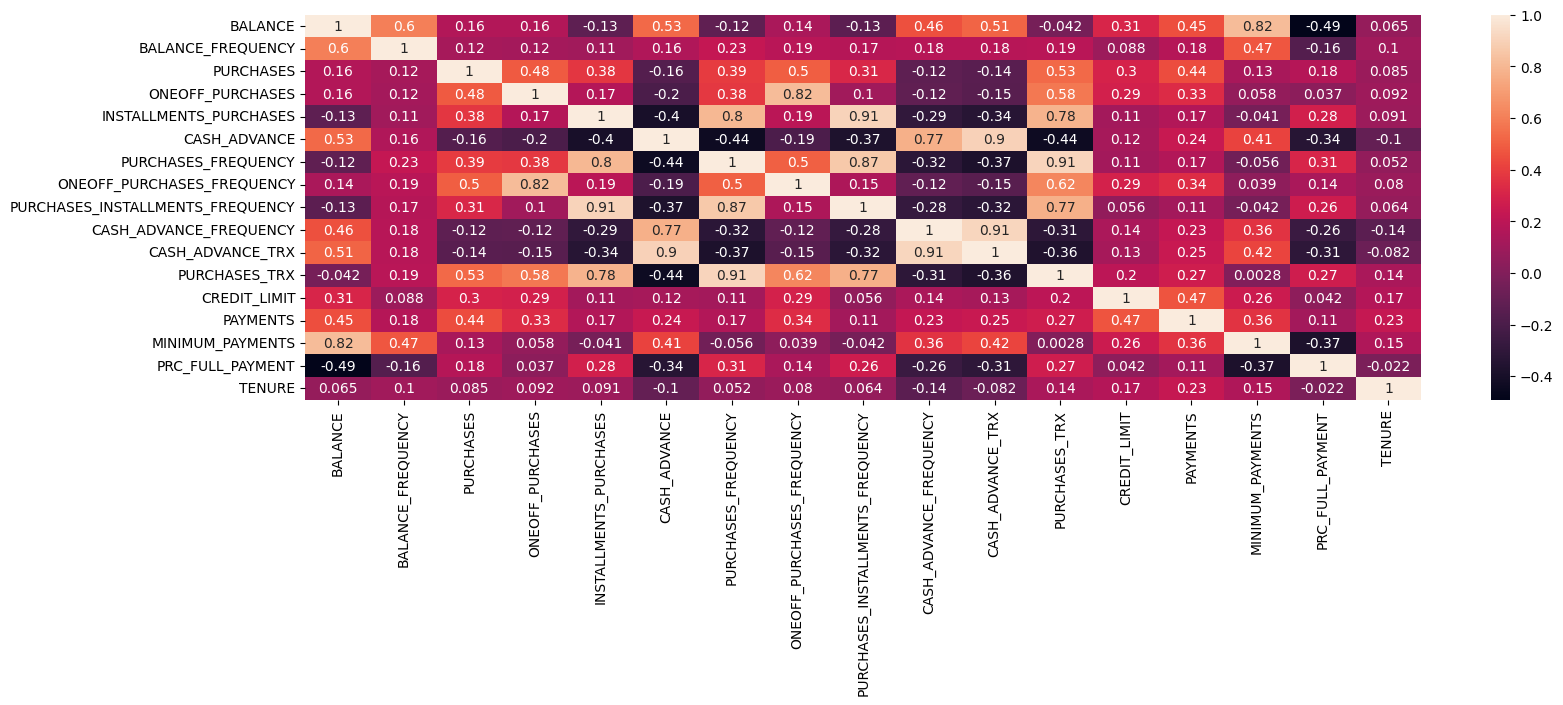

In [17]:
plt.figure(figsize=(18,5))
sns.heatmap(log_transformed_df.corr(), annot=True)
plt.show()

In [18]:
correlation_matrix = log_transformed_df.corr()

threshold = 0.9
highly_correlated_pairs = []

for i, col in enumerate(log_transformed_df.columns):
    for j in range(i + 1, len(log_transformed_df.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((col, log_transformed_df.columns[j]))

new_s = set()
print("Pairs of columns with high correlation:")
for col1, col2 in highly_correlated_pairs:
    print(f"{col1} and {col2}: {correlation_matrix.loc[col1, col2]}")
    new_s.add(col1)
#     new_s.add(col2) 

Pairs of columns with high correlation:
INSTALLMENTS_PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY: 0.9063820208314246
PURCHASES_FREQUENCY and PURCHASES_TRX: 0.9088566850412443
CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX: 0.9138035652878223


In [19]:
data_new = log_transformed_df.drop(columns=list(new_s))

<center><h3><font face=verdona color=cyan>Scaling data</font></h3>

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = pd.DataFrame(scaler.fit_transform(data_new))
scaled_df

0         1         2         3         4         5         6   \
0     0.379045  0.818182  0.001945  0.000000  0.000000  0.000000  0.115477   
1     0.819116  0.909091  0.000000  0.000000  0.815075  0.000000  0.000000   
2     0.793799  1.000000  0.015766  0.626611  0.000000  1.000000  0.000000   
3     0.680676  1.000000  0.000326  0.266894  0.000000  0.115477  0.000000   
4     0.761229  1.000000  0.027188  0.000000  0.000000  0.000000  0.662965   
...        ...       ...       ...       ...       ...       ...       ...   
8631  0.195587  0.500000  0.000426  0.290753  0.000000  0.222393  0.000000   
8632  0.343413  1.000000  0.005936  0.000000  0.000000  0.000000  0.874469   
8633  0.324169  0.833333  0.002945  0.000000  0.000000  0.000000  0.736966   
8634  0.271065  0.833333  0.000000  0.000000  0.336954  0.000000  0.000000   
8635  0.601093  0.666667  0.022293  0.659207  0.450926  0.736966  0.000000   

            7         8         9         10        11        12   13  
0     0.000000  0.186733  0.466811  0.488040  0.438874  0.000000  1.0  
1     0.333889  0.000000  0.771814  0.766879  0.620013  0.289506  1.0  
2     0.000000  0.435970  0.782631  0.592105  0.572303  0.000000  1.0  
3     0.000000  0.117816  0.495375  0.600121  0.488693  0.000000  1.0  
4     0.000000  0.373467  0.558912  0.667234  0.692007  0.000000  1.0  
...        ...       ...       ...       ...       ...       ...  ...  
8631  0.000000  0.117816  0.358276  0.374574  0.336389  0.000000  0.0  
8632  0.000000  0.330750  0.466811  0.532218  0.346621  0.584963  0.0  
8633  0.000000  0.304549  0.466811  0.404392  0.392423  0.321928  0.0  
8634  0.227915  0.000000  0.358276  0.364580  0.358114  0.321928  0.0  
8635  0.227915  0.540180  0.495375  0.381348  0.398482  0.000000  0.0  

[8636 rows x 14 columns]

<center><h3><font face=verdona color=cyan>Using Explained Variance to determine the number of components

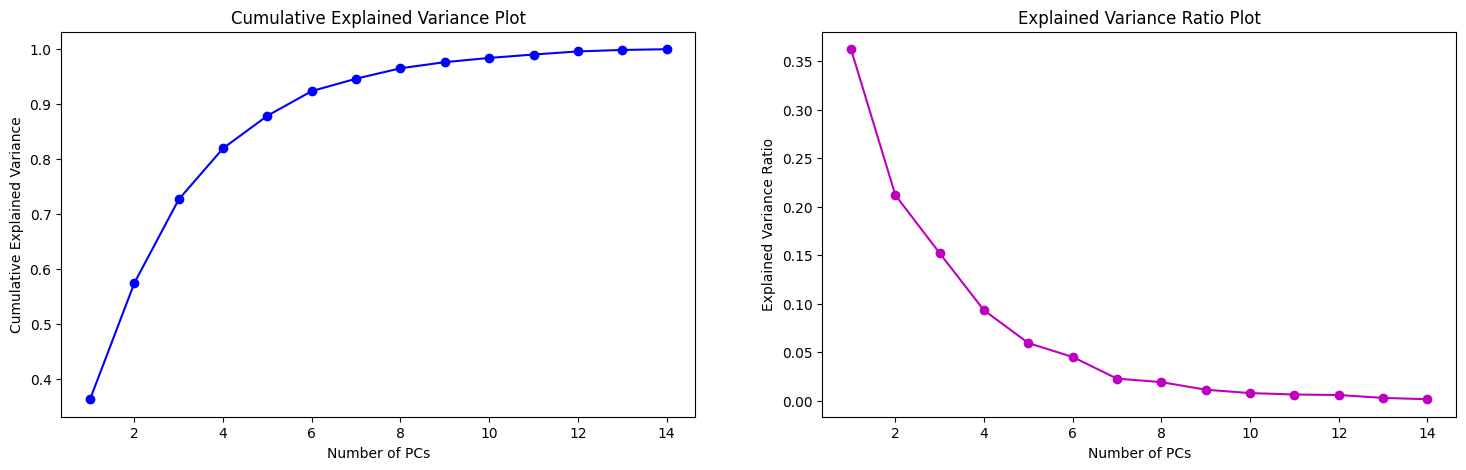

In [ ]:
pca = PCA()
pca.fit(scaled_df)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
axes[0].set_xlabel('Number of PCs')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].set_title('Cumulative Explained Variance Plot')


axes[1].plot(list(range(1, len(explained_variance_ratio) + 1)), explained_variance_ratio, 'mo-')
axes[1].set_xlabel('Number of PCs')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('Explained Variance Ratio Plot')
plt.show()

In [29]:
print('\nexplained_variance : ',explained_variance_ratio,
'\ncumulative_variance : ', cumulative_variance)


explained_variance :  [0.3625151  0.21201563 0.15199912 0.09302986 0.05930472 0.04490986
 0.0225696  0.01896785 0.0111512  0.00765455 0.00619879 0.00566329
 0.00268917 0.00133126] 
cumulative_variance :  [0.3625151  0.57453073 0.72652985 0.81955971 0.87886444 0.92377429
 0.94634389 0.96531174 0.97646294 0.9841175  0.99031629 0.99597958
 0.99866874 1.        ]


In [ ]:
cumulative_variance_threshold = 0.8
num_components = np.argmax(cumulative_variance >= cumulative_variance_threshold) + 1
num_components

In [22]:
pca = PCA(n_components=num_components)

In [ ]:
# scaled_df = scaler.fit_transform(data_new)
pca_df = pca.fit_transform(data_new)
df_new = pd.DataFrame(pca_df)
df_new.head()

<h2><font face=verdona color=green>Using elbow method to determine the optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
kmeans_models = [KMeans(n_clusters=k,init='k-means++', random_state=42).fit(df_new) for k in range(1, 11)]
innertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(18,5))
plt.plot(range(1, 11), innertia, "ro-")
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
innertia

In [ ]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(18,5))
silhoutte_scores = [silhouette_score(df_new, model.labels_) for model in kmeans_models[1:]]
plt.plot(range(2,11), silhoutte_scores, "bo-")
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [ ]:
silhoutte_scores

<b>As per visualization and for little more depth in customer segmentation 4 clusters would be optimal 

<h2><font face=verdona color=green> Cluster Model Building (1)

In [28]:
kmeans = KMeans(n_clusters=4, n_init='auto',init='k-means++', random_state=42, max_iter=100)
y_kmeans = kmeans.fit_predict(df_new)

In [ ]:
log_transformed_df['KMC_clusters'] = y_kmeans
log_transformed_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
axes = ax.flatten()
sns.countplot(x=log_transformed_df['KMC_clusters'], ax=ax[0])
sns.scatterplot(x=df_new[0],y=df_new[0], hue=log_transformed_df['KMC_clusters'], ax=ax[1])
plt.show()

In [ ]:
scatter_plot = go.Scatter3d(
    x=df_new[0],
    y=df_new[0],
    z=df_new[0],
    marker=dict(
        color=log_transformed_df['KMC_clusters'], 
        colorscale='Viridis', 
        size=5, 
        opacity=0.8
    )
)

fig = go.Figure(data=[scatter_plot])
# pio.write_image(fig, 'kmc_clusters_3d.png', format="png")

#as the angle of viewing on initial plot was not efficient to view all cluster i had to manually 
#take screen schots of the graphy after rotating and zooming a bit

display(Image(filename='kmc_clusters_3d.png'))

<h2><font face=verdona color=green>Silhouette score (1)</font></h2>
<b>to measure how well the data points can be differenciated from other clusters as well as how they can be categorized in their own cluster

In [ ]:
silhouette_score(df_new, y_kmeans)

<h2><font face=verdona color=green>Dendogram(Heirarchial Clustering) </font></h2>
<b>to get the optimal number of clusters

In [ ]:
pca2 = PCA(n_components=num_components)

pca_df_ = pca2.fit_transform(data_new)
df_new_ = pd.DataFrame(pca_df_)
df_new_.head()

In [ ]:
dendogram = sch.dendrogram(sch.linkage(pca_df_, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<font face=georgia><b>According to the dendogram the longest line with no other line intervening it directs us for 2 cluster but still for little more depth i will have 4 clusters.

<h2><font face=verdona color=green>Cluster Model Building (2)

In [35]:
agc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agc = agc.fit_predict(df_new_)

In [ ]:
log_transformed_df['Agc_clusters'] = y_agc
log_transformed_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
axes = ax.flatten()
sns.countplot(x=log_transformed_df['Agc_clusters'], ax=ax[0])
sns.scatterplot(x=df_new_[0], y=df_new_[0], hue=log_transformed_df['Agc_clusters'], ax=ax[1])
plt.show()

<h2><font face=verdona color=green>Silhouette score (2)</font></h2>
<b>Silhouette score closer to 1 indicates clusters are far away from each other and easily seperaple but in real world problems
    its never like that, as seen here the points are close to each other

In [ ]:
silhouette_score(df_new_, y_agc)

In [ ]:
scatter_plot = go.Scatter3d(
    x=df_new_[0],
    y=df_new_[0],
    z=df_new_[0],
    marker=dict(
        color=log_transformed_df['Agc_clusters'],  
        colorscale='Viridis',
        size=5,
        opacity=0.8
    )
)

fig = go.Figure(data=[scatter_plot])
# pio.write_image(fig, 'agc_clusters_3d.png', format="png")
display(Image(filename='agc_clusters_3d.png'))

<h2><font face=verdona color=green>Comparing Clusters of both the Models

In [ ]:
sns.countplot(x=log_transformed_df['Agc_clusters'], hue=log_transformed_df['KMC_clusters'])

<pre><h2><font face=verdona color=green>The cluster 0 of Agc_clusters and cluster 3 of KMC_clusters seem to group mostly the same customers, while cluster 1 of Agc_clusters and cluster 0 of KMC_clusters and cluster 1 of Agc_clusters with that of cluster 2 and cluster 2 of KMC_clusters and cluster 4 of Agc_clusters matches cluster 1 of KMC_clusters .</font></h2><b>(cluster number is not the same but the each cluster of Agc_clusters represent some cluster of KMC_clusters)

Therefore 
    cluster 0 of Agc_clusters ~ cluster 3 of KMC_clusters
    cluster 1 of Agc_clusters ~ cluster 0 of KMC_clusters    
    cluster 2 of Agc_clusters ~ cluster 2 of KMC_clusters
    cluster 3 of Agc_clusters ~ cluster 1 of KMC_clusters    

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes = ax.flatten()
for index, col in enumerate(log_transformed_df.columns[-2:]):
    axes[index].set_title(f'{col} - Cluster Distribution')
    axes[index].pie(x=log_transformed_df[col].value_counts(),
        labels =log_transformed_df[col].value_counts().index[:], autopct='%.2f%%' )
plt.show()

<h2><font face=verdona color=green>Now I can visualize are the features' range that differenciate between clusters

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(log_transformed_df.columns)+1)/3),
                       figsize=(18,5*round((len(log_transformed_df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(log_transformed_df.columns):
    sns.histplot(x=log_transformed_df[col], hue=log_transformed_df['Agc_clusters'], kde=True, ax=axes[index],
                 hue_order=[3, 2,1,0],palette=['orange', 'r', 'b', 'g'])

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(log_transformed_df.columns)+1)/3), figsize=(18,5*round((len(log_transformed_df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(log_transformed_df.columns):
    sns.histplot(x=log_transformed_df[col], hue=log_transformed_df['KMC_clusters'], kde=True, ax=axes[index],
                 hue_order=[3, 2,1,0],palette=['g','r','orange', 'b'])

<h3><font color=red 
          face=verdona><center>Since KMC_clusters have a better silhoutte score and Also majorly the cluster are the same,<br>
I will consider KMC_clusters as the target feature generated by KMeans

In [44]:
log_transformed_df.drop(columns=['Agc_clusters'], inplace=True)

<center><font color=magenta face=georgia><h1>Cluster based EDA

<font face=georgia color=green><h3>As i havent droppend any rows the indices remain the same as raw data thus can assign the clusters to the original data

In [ ]:
df['KMC_clusters'] = log_transformed_df['KMC_clusters']
df.head()

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df.columns)+1)/3), figsize=(18,5*round((len(df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df.columns):
    sns.boxplot(x=df['KMC_clusters'], y=df[col], ax=axes[index])

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df.columns)+1)/3), figsize=(18,5*round((len(df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df.columns):
    sns.scatterplot(data=df, x='KMC_clusters', y=col, ax=axes[index], hue='KMC_clusters', palette=['red', 'green', 'blue', 'yellow'])

In [ ]:
for cluster in df.drop(['KMC_clusters'],axis=1):
    grid= sns.FacetGrid(df, col='KMC_clusters')
    grid= grid.map(sns.kdeplot, cluster)
plt.show()

<h4>Seperating different clusters data to understand the data better

In [ ]:
cluster_1_df = df[df["KMC_clusters"]==0]
cluster_2_df = df[df["KMC_clusters"]==1]
cluster_3_df = df[df["KMC_clusters"]==2]
cluster_4_df = df[df["KMC_clusters"]==3]

num_rows = round((len(df.columns) + 1) / 3)
num_cols = 3

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 3 * num_rows))
axes = ax.flatten()

clusters = [cluster_1_df, cluster_2_df, cluster_3_df,cluster_4_df]
colors = ['r','g', 'b', 'orange']
for index, col in enumerate(df.columns):
    for cluster_index, cluster_df in enumerate(clusters):
        axes[index].axvline(cluster_df[col].median(), c=colors[cluster_index],
                            label=f'Cluster {cluster_index + 1}', linestyle='-')
    axes[index].set_xlabel(col)
    axes[index].legend()
plt.suptitle('Where does the median lie in each cluster ?', font='georgia', fontsize=30, y=1)
plt.tight_layout()
plt.show()

In [ ]:
len(cluster_1_df)



<pre><h1><font color=orange>============Cluster based Observations===========
</font>
Cluster 0:</h1>

This is the second largest cluster with 1316 customers.
Customers in this cluster have a relatively "higher average balance" (mean of 1937.19) and make moderate to high-value
purchases.
They have a mix of one-off and installment purchases.
Cash advance usage is moderate.
They tend to make purchases frequently.
They have a moderate credit limit.
Payments made are relatively high compared to the minimum payments.
They don't fully pay their balance (PRC_FULL_PAYMENT is relatively low).

<h2>Potential schemes to attract Cluster 0 customers:</h2>

Offer cashback or rewards on frequent purchases to encourage them to spend more.
Promote credit limit increases to boost their purchasing power.
Introduce installment purchase plans for high-value items.

<h1>Cluster 1:</h1>
This cluster is the largest with 7430 customers.
Customers in this cluster have a lower average balance (mean of 1439.13) and tend to make smaller purchases.
One-off purchases are infrequent, and installment purchases are also relatively low.
Cash advance usage is significant in this cluster.
They make purchases less frequently compared to Cluster 0.
Credit limits are moderate.
Payments and minimum payments are relatively low.
Most customers in this cluster don't fully pay their balances too(PRC_FULL_PAYMENT is low).

<h2>Potential schemes to attract Cluster 1 customers:</h2>
Offer incentives or discounts on cash advances to encourage usage.
Provide financial management tools and guidance to help them improve their payment behavior.
Introduce budget-friendly purchase options and promotions.

<h1>Cluster 2:</h1>
This cluster is the smallest with only 22 customers.
Customers in this cluster have a high average balance (mean of 5728.55) and make very high-value purchases.
They have a high frequency of purchases and one-off purchases.
Cash advance usage is low.
They tend to make purchases frequently and have a high credit limit.
Payments made are substantial compared to minimum payments.
Most customers in this cluster fully pay their balances (PRC_FULL_PAYMENT is high).

<h2>Potential schemes to attract Cluster 2 customers:</h2>
Offer premium rewards and exclusive benefits for high-value customers.
Provide personalized concierge services or exclusive offers.
Focus on credit limit increases for even larger purchases.
Offer investment or savings products to make use of their high balances.

<h1>Cluster 3:</h1>
This cluster consists of 182 customers being the second smallest cluster.
Customers in this cluster have a moderate average balance (mean of 3483.39) and make moderately high-value purchases.
They have a mix of one-off and installment purchases.
Cash advance usage is moderate.
They make purchases frequently.
Credit limits are moderate.
Payments made are decent compared to minimum payments.
Like Cluster 0, they don't fully pay their balances (PRC_FULL_PAYMENT is relatively low).

<h2>Potential schemes to attract Cluster 3 customers:</h2>
Offer rewards or discounts for frequent shoppers.
Encourage the use of credit cards for purchases through promotions.
Provide budgeting tools to help customers manage their payments better.


I have saved this content into cluster_info.txt so can access it in my web 

<h3><center><font face=verdona color=brown>Based on the characteristics above I can differenciate the customers into a cluster,<br> Now I will need to build a Multi-class Classification model which will be used for predicting cluster of New customers.

<b><pre><center>The data is already preprocessed thus I will now build the model 

<center><font color=magenta face=georgia><h1>🔀Train Test Split<br>
🛠️Building Classification Model<br>
🏋️‍♂️Training the Model<br>
🎯Evauluating the Model<br>

<pre>training model on null filled data with no other preprocessing

In [ ]:
print(df.shape)
df.head()

In [52]:
df.to_csv('Clustered_data.csv')

In [53]:
X = df.drop(columns=['KMC_clusters']).values
y = df['KMC_clusters'].values

In [ ]:
# tried all of these models and kept only the best ones
l_reg = LogisticRegression()
gb = GradientBoostingClassifier()
rforest = RandomForestClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
dtree = DecisionTreeClassifier()
svc = SVC(kernel='linear')
ada = AdaBoostClassifier(base_estimator=dtree)

kfold = KFold(n_splits=5, shuffle=True, random_state=32)
models = [dtree,xgbrf,xgb,rforest,gb,l_reg, svc]  
model_names = ['Dtree','XGBRF' ,'XGB' ,'RForest' , 'GradientBoosting', 'Logistric Regression', 'SVC']  
best_indices_dict = {}

for i, model in enumerate(models):
    model_name = model_names[i]
    best_accuracy = 0.0
    print('---------------------------', model_name, '------------------------------')
    mean_val_acc, mean_test_acc = [], []

    for train_indices, test_indices in kfold.split(X):
        X_train, X_val, y_train, y_val = train_test_split(X[train_indices], y[train_indices], test_size=0.2, random_state=42)
        model.fit(X_train, y_train)

        y_val_pred = model.predict(X_val)

        val_accuracy = round(accuracy_score(y_val, y_val_pred), 4)
        mean_val_acc.append(val_accuracy)

        X_test, y_test = X[test_indices], y[test_indices]
        y_test_pred = model.predict(X_test)
        test_accuracy = round(accuracy_score(y_test, y_test_pred), 4)
        mean_test_acc.append(test_accuracy)

        if val_accuracy > test_accuracy:
            print(f'{Fore.GREEN}Validation Accuracy : ', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
            print(f'{Fore.RED}Test Accuracy : ', round(test_accuracy, 4), f"{Fore.RESET}")
            print('Conf. matrix : \n', confusion_matrix(y_test, y_test_pred))
        else:
            print(f'{Fore.RED}Validation Accuracy :', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
            print(f'{Fore.GREEN}Test Accuracy : ', round(test_accuracy, 4), f"{Fore.RESET}")
            print('Conf. matrix : \n', confusion_matrix(y_test, y_test_pred))
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_indices_dict[model_name] = {
                'train': train_indices,
                'test': test_indices,
                'test_true': y_test,
                'test_preds': y_test_pred
            }

    print('Mean Val Accuracy : ', round(np.mean(mean_val_acc), 4), 'Mean Test Accuracy : ', round(np.mean(mean_test_acc), 4))

<h3><font face=georgia color=arial>The Decision Tree Classifier is the best model with the <font color=green>mean accuracy of 99.99% which is  100%</font>, due to its consistently high average test and validation accuracy and faster then other models. This indicates strong generalization performance across validation and test sets with much less time consumption, making it a robust choice.

<center><font color=magenta face=georgia><h1>Building Preprocessor Pipeline

In [55]:
from train_preprocessor import preprocessor,col_dropper

#preprocessing pipeline (same preprocessing steps for clustering and classification)
preprocessor_pipeline = Pipeline(steps=[
    ('preprocessor', FunctionTransformer(preprocessor)),
    ('pca', PCA(n_components=0.95))
])

model_preprocessor = Pipeline(steps=[('col dropper', FunctionTransformer(col_dropper)),
                                     ('Simple Imputer', SimpleImputer(strategy='mean'))])

<center><font color=magenta face=georgia><h1>Building Cluster Model Pipeline

In [56]:
cluster_model_pipeline = Pipeline(steps=[
    ('Kmeans',  KMeans(n_clusters=4, n_init='auto',init='k-means++', random_state=42, max_iter=100))])

<center><font color=magenta face=georgia><h1>Importing Raw Data

In [ ]:
data_1 = pd.read_csv('Customer Data.csv')
print(data_1.shape)
data_1.head()

<center><font color=magenta face=georgia><h1>Applying Preprocessor and KMeans Model to assign clusters

In [ ]:
data_2 = preprocessor_pipeline.fit_transform(data_1)
processed_df = pd.DataFrame(data_2)
processed_df['KMC_clusters'] = cluster_model_pipeline.fit_predict(data_2)
processed_df.head()

<center><font color=magenta face=georgia><h1>Applying Classifier preprocessor

In [ ]:
data_1 = model_preprocessor.fit_transform(data_1)
data_1

<center><font color=magenta face=georgia><h1>Train-Val-Test Split

In [60]:
train_indices_for_Dtree = best_indices_dict['Dtree']['train']
test_indices_for_Dtree = best_indices_dict['Dtree']['test']

# data_1 for independent variables because we have only dropped cust_id and imputed median 
# processed_df for dependent variable because the indices are same to the corresponding
# records from data_1 
x_train, x_val, y_train, y_val = train_test_split(data_1[train_indices_for_Dtree],#training data (raw data)
                    processed_df['KMC_clusters'].values[train_indices_for_Dtree],test_size=0.2)

<center><font color=magenta face=georgia><h1>Building Classifier Model Pipeline

In [61]:
model_pipeline = Pipeline(steps=[('Dtree', DecisionTreeClassifier())])

<center><font color=magenta face=georgia><h1>Training Model Pipeline

In [ ]:
model_pipeline.fit(x_train,y_train)

<center><font color=magenta face=georgia><h1>Validating and Evaluating Pipeline

In [ ]:
y_preds = model_pipeline.predict(x_val)
print('Val Accuracy score : ', accuracy_score(y_val, y_preds))

<center><font color=magenta face=georgia><h1>Saving Preprocessor and Pipeline

In [ ]:
joblib.dump(model_preprocessor, 'model_preprocessor.pkl')
joblib.dump(model_pipeline, 'pipeline_model.pkl')

<center><font color=magenta face=georgia><h1>Importing the Pipeline

In [65]:
pipe_preprocessor = joblib.load('model_preprocessor.pkl')
pipe_model = joblib.load('pipeline_model.pkl')

<center><font color=magenta face=georgia><h1>Predicting on Test/Unseen data

We are predicting the clusters of new customers based on old cluster data so we will get raw data, preprocess it and predict it 

In [66]:
new = pd.read_csv('Customer Data.csv')
new.head()

new = model_preprocessor.transform(new)

In [67]:
#preprocessing entire data but keeping only test indices data
x_test =new[test_indices_for_Dtree]

In [ ]:
y_preds = pipe_model.predict(x_test)
y_test = processed_df['KMC_clusters'].values[test_indices_for_Dtree] #evaluating using clusters previously assigned by KMeans
print('Test Accuracy score : ', accuracy_score(y_test, y_preds))

<h1><pre><font color=orange face=gabriola>Now we can Predict the new customer belongs to which cluster and his characteristics .


1)So if we have the loan request for the customers we can make out the person belongs to which cluster and
how the people of the respective cluster are when it comes to paying installments similarly other facilities 
and offers applicable to new customers

2)Also if you notice we do not require all the columns for cluster prediction so we will take input as only 
required columns and can also predict missing columns based on cluster